In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import keras
from keras.models import Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
arabic_characters = ['alef', 'beh', 'teh', 'theh', 'jeem', 'hah', 'khah', 'dal', 'thal',
                    'reh', 'zain', 'seen', 'sheen', 'sad', 'dad', 'tah', 'zah', 'ain',
                    'ghain', 'feh', 'qaf', 'kaf', 'lam', 'meem', 'noon', 'heh', 'waw', 'yeh']

In [6]:
# Path to your dataset directory in Kaggle
train_dataset_path = '/kaggle/input/ahcd1/Train Images 13440x32x32/train'
test_dataset_path = '/kaggle/input/ahcd1/Test Images 3360x32x32/test'

In [7]:
def extract_label_from_filename(filename):
    # Extract label from filename
    parts = filename.split('_')
    label = int(parts[-1].split('.')[0])
    return label

In [8]:
def load_and_flatten_image(image_path):
    with Image.open(image_path) as img:
        img = img.convert('L')  # Convert to grayscale
        img = img.resize((32, 32))  # Resize if needed
        img_array = np.array(img)
        return img_array.flatten()  # Flatten the image to 1D array

In [9]:
def load_dataset(dataset_path):
    image_data = []
    labels = []
    for filename in os.listdir(dataset_path):
        if filename.endswith('.png'):
            image_path = os.path.join(dataset_path, filename)
            image_data.append(load_and_flatten_image(image_path))
            labels.append(extract_label_from_filename(filename))
    return np.array(image_data), np.array(labels)

In [10]:
def display_image_with_label(image_path, arabic_characters):
    img = Image.open(image_path).convert('L')  # Convert to grayscale if needed
    label = extract_label_from_filename(os.path.basename(image_path))
    plt.imshow(img, cmap='gray')
    plt.title(f'{arabic_characters[label]}', fontsize=12)  # Larger font size
    plt.axis('off')
    plt.show()

In [15]:
def load_image(image_path):
    # Load and resize image
    with Image.open(image_path) as img:
        img = img.convert('L')  # Convert to grayscale if needed
        img = img.resize((32, 32))  # Resize to smaller size if needed
    return img

In [16]:
def display_images_grid(image_paths, arabic_characters):
    # Create a grid of images
    num_images = len(image_paths)
    num_cols = 4
    num_rows = (num_images + num_cols - 1) // num_cols  # Compute number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))
    axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

    for ax, image_path in zip(axes, image_paths):
        img = load_image(image_path)
        label = extract_label_from_filename(os.path.basename(image_path))
        ax.imshow(img, cmap='gray')
        ax.set_title(f'{arabic_characters[label-1]}', fontsize=16)
        ax.axis('off')
    
    # Turn off remaining empty subplots
    for ax in axes[len(image_paths):]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

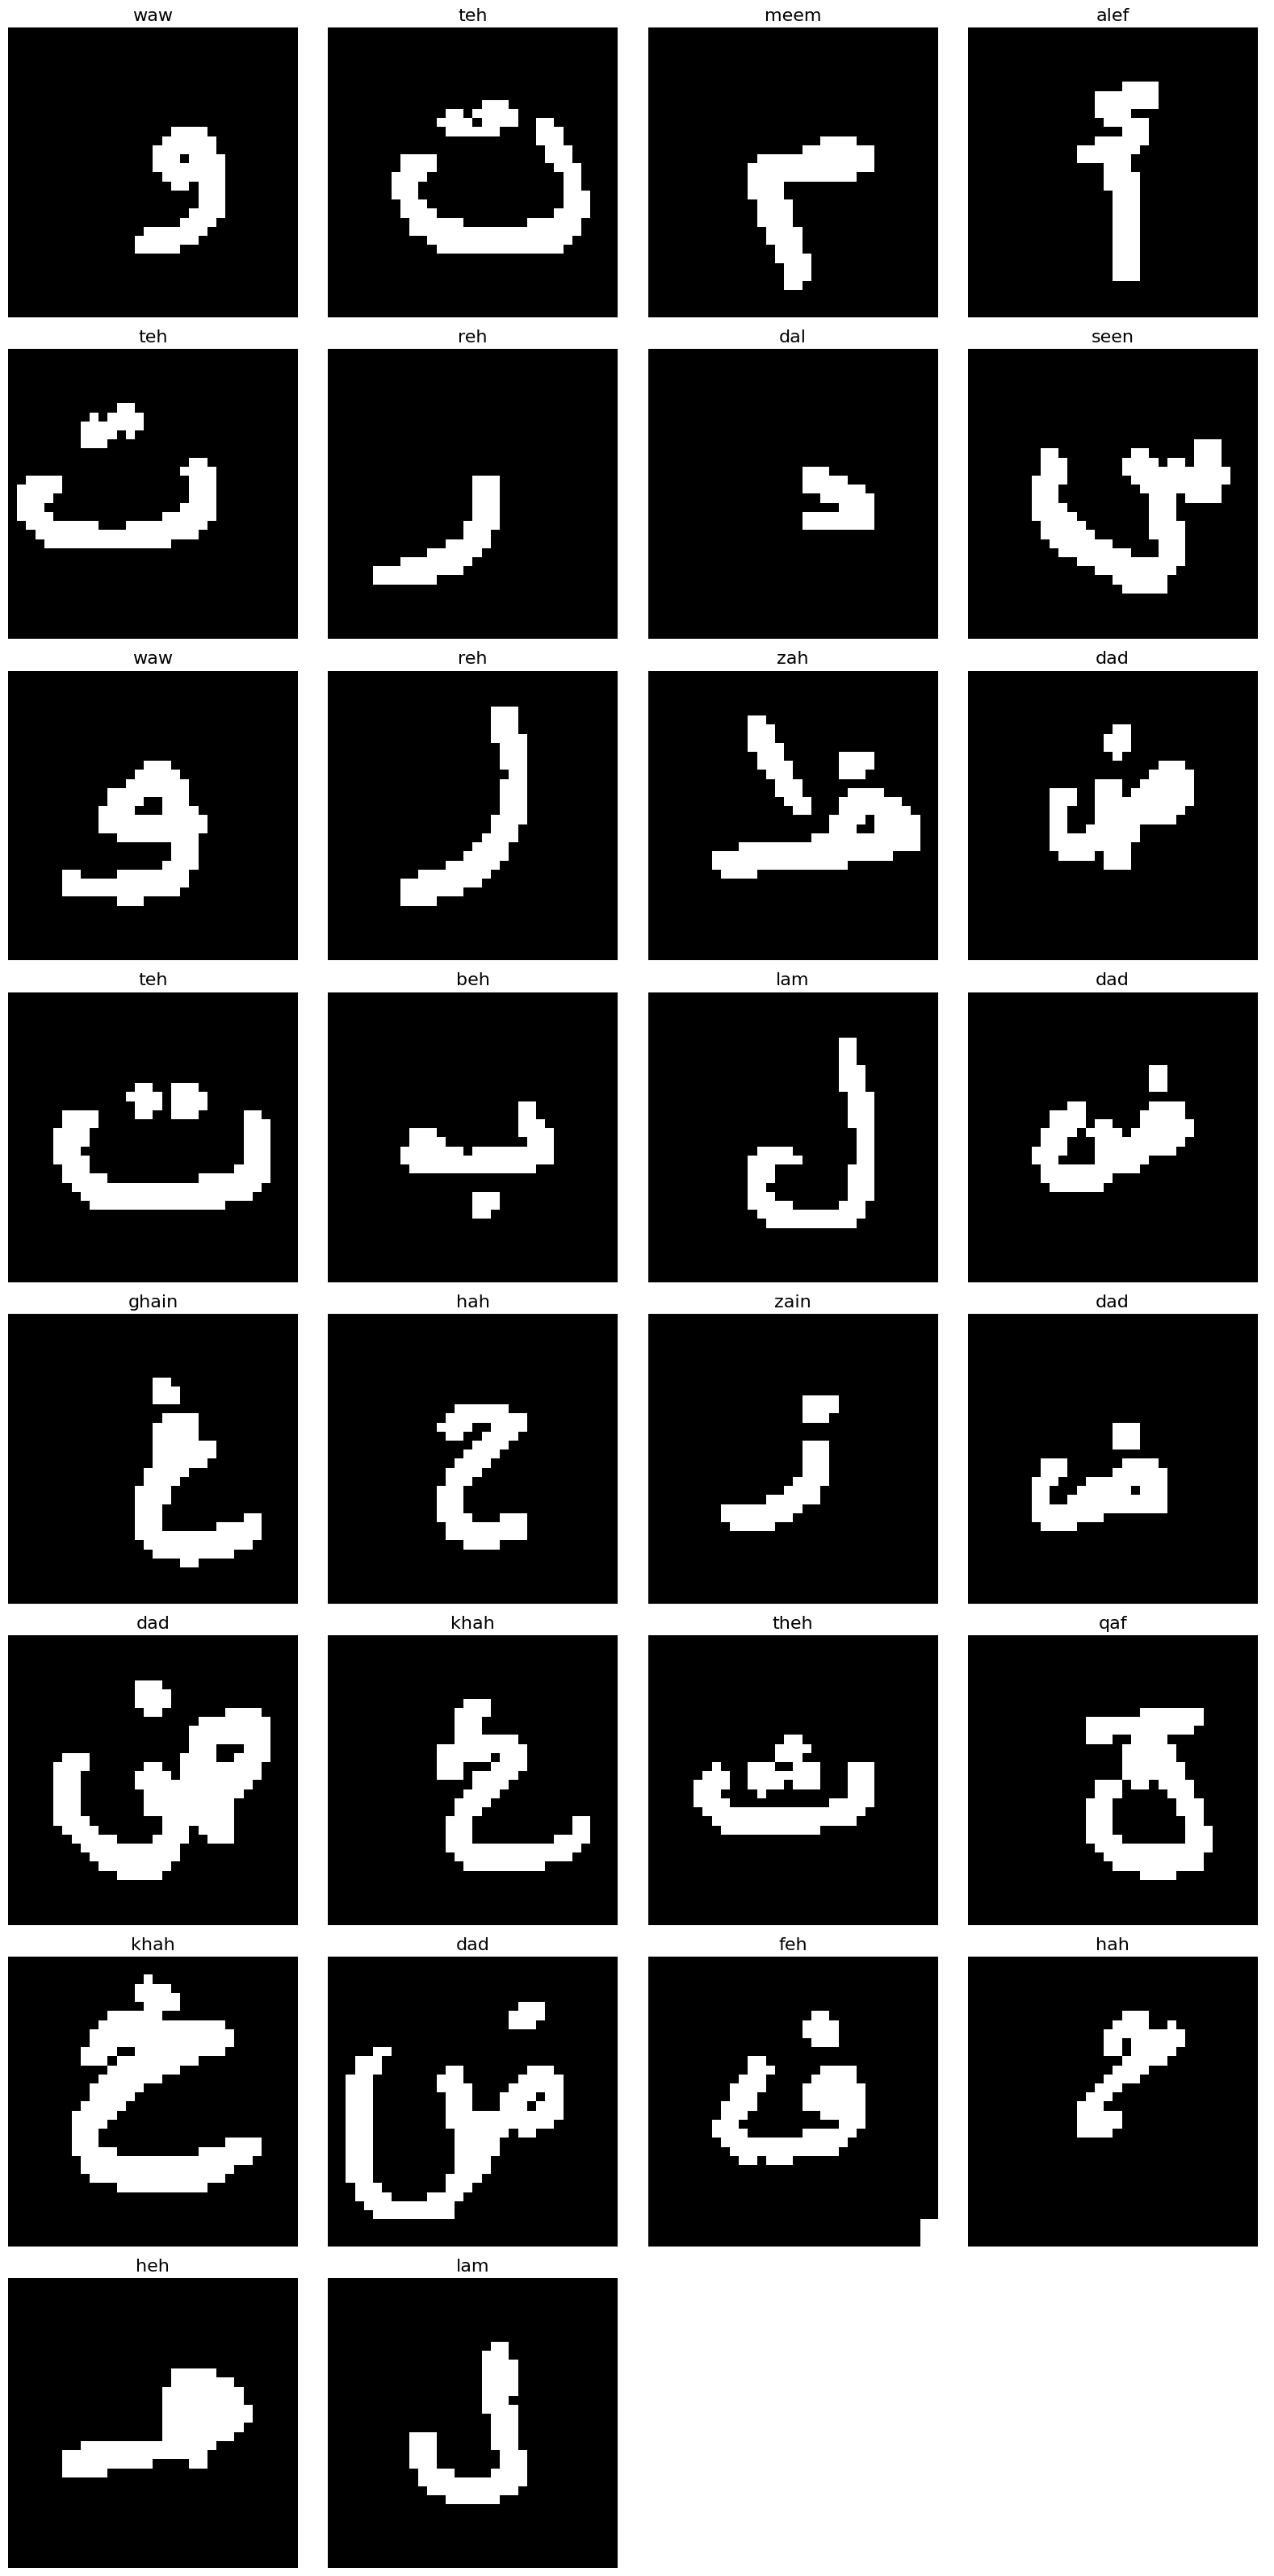

In [17]:
# Collect 30 image paths
image_paths = []
for filename in os.listdir(train_dataset_path):
    if filename.endswith('.png'):
        image_paths.append(os.path.join(train_dataset_path, filename))
        if len(image_paths) == 30:
            break

# Display the images in a grid
display_images_grid(image_paths, arabic_characters)

In [18]:
# Load training and testing datasets
X_train, y_train = load_dataset(train_dataset_path)
X_test, y_test = load_dataset(test_dataset_path)

# Train the SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

Classification Report:
               precision    recall  f1-score   support

        alef       0.78      0.89      0.83       120
         beh       0.57      0.68      0.62       120
         teh       0.32      0.37      0.34       120
        theh       0.39      0.36      0.38       120
        jeem       0.31      0.38      0.34       120
         hah       0.28      0.36      0.31       120
        khah       0.34      0.34      0.34       120
         dal       0.46      0.58      0.52       120
        thal       0.46      0.45      0.46       120
         reh       0.61      0.70      0.65       120
        zain       0.50      0.43      0.47       120
        seen       0.46      0.53      0.50       120
       sheen       0.41      0.47      0.44       120
         sad       0.38      0.40      0.39       120
         dad       0.41      0.39      0.40       120
         tah       0.44      0.50      0.47       120
         zah       0.41      0.38      0.39       120
   

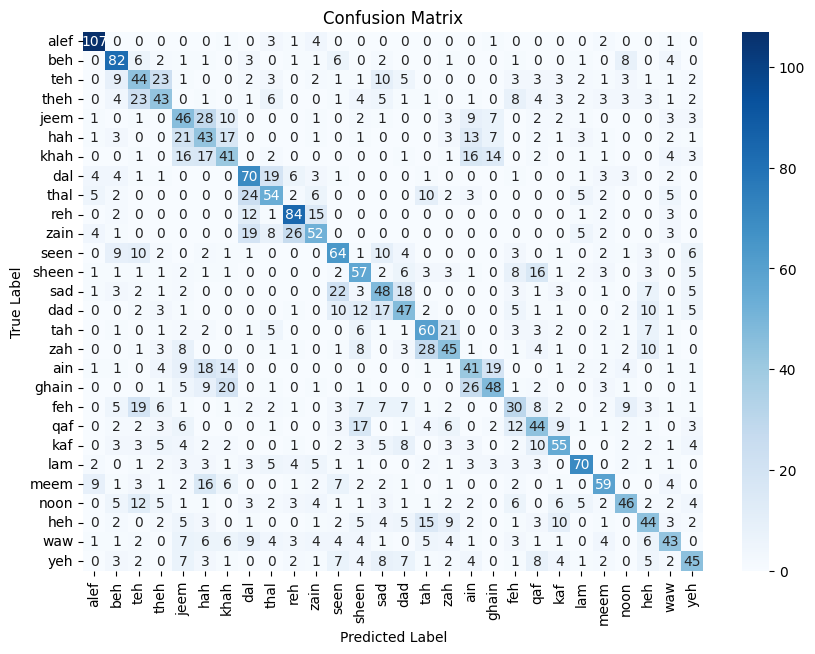

In [19]:
# Predict and evaluate
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:\n", cm)

# Classification report
cr = classification_report(y_test, y_pred, target_names=arabic_characters)
print("Classification Report:\n", cr)

# Visualize confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=arabic_characters, yticklabels=arabic_characters)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [20]:
# Load training and testing datasets
X_train, y_train = load_dataset(train_dataset_path)
X_test, y_test = load_dataset(test_dataset_path)

# Train the SVM model with a different kernel to compare results
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

Classification Report:
               precision    recall  f1-score   support

        alef       0.90      0.97      0.93       120
         beh       0.87      0.88      0.88       120
         teh       0.62      0.62      0.62       120
        theh       0.74      0.62      0.68       120
        jeem       0.63      0.78      0.70       120
         hah       0.71      0.68      0.69       120
        khah       0.72      0.54      0.62       120
         dal       0.63      0.77      0.69       120
        thal       0.62      0.68      0.65       120
         reh       0.69      0.87      0.77       120
        zain       0.77      0.73      0.75       120
        seen       0.73      0.78      0.76       120
       sheen       0.72      0.82      0.76       120
         sad       0.71      0.68      0.69       120
         dad       0.73      0.64      0.68       120
         tah       0.72      0.73      0.73       120
         zah       0.68      0.62      0.65       120
   

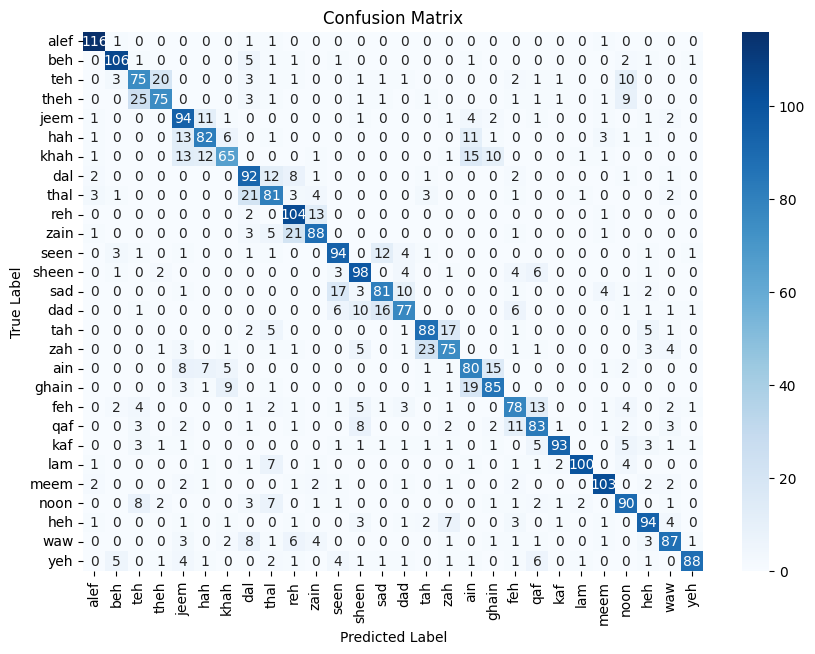

In [21]:
# Predict and evaluate
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:\n", cm)

# Classification report
cr = classification_report(y_test, y_pred, target_names=arabic_characters)
print("Classification Report:\n", cr)

# Visualize confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=arabic_characters, yticklabels=arabic_characters)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Classification Report:
               precision    recall  f1-score   support

        alef       0.76      0.82      0.79       120
         beh       0.53      0.57      0.55       120
         teh       0.37      0.38      0.38       120
        theh       0.31      0.29      0.30       120
        jeem       0.42      0.34      0.38       120
         hah       0.46      0.43      0.45       120
        khah       0.34      0.32      0.33       120
         dal       0.41      0.54      0.47       120
        thal       0.29      0.30      0.30       120
         reh       0.58      0.71      0.64       120
        zain       0.52      0.47      0.49       120
        seen       0.40      0.37      0.38       120
       sheen       0.34      0.29      0.31       120
         sad       0.41      0.39      0.40       120
         dad       0.30      0.28      0.29       120
         tah       0.38      0.42      0.40       120
         zah       0.31      0.28      0.30       120
   

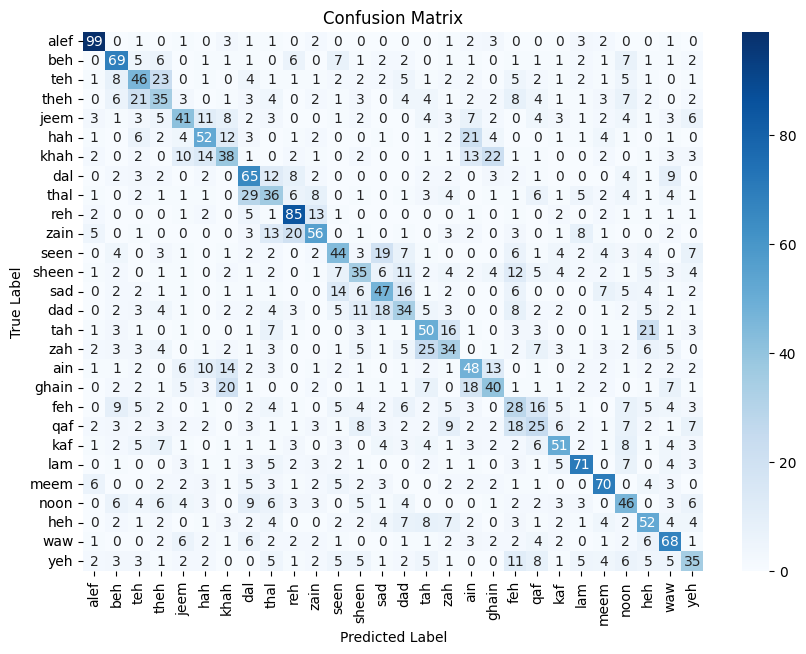

In [23]:
# Train the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:\n", cm)

# Classification report
cr = classification_report(y_test, y_pred, target_names=arabic_characters)
print("Classification Report:\n", cr)

# Visualize confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=arabic_characters, yticklabels=arabic_characters)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()